#                                   Black Friday Data Exploration and Prediction

#### About Notebook: 



#### Importing librarys 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#### About Dataset
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

In [2]:
data = pd.read_csv("BlackFriday.csv")

#### Dataset sample

In [3]:
print('Rows {rows} and Columns {columns}'.format(rows=data.shape[0],columns=data.shape[1]))

Rows 537577 and Columns 12


In [4]:
# Displaying first four rows of the dataframe
data.head(4)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [5]:
# Displaying last four rows of the dataframe
data.tail(4) 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [6]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


### Data clean up for Analysis (filling missing values)

#### Identifying the missing vales in data

In [7]:
missing_values_count = data.isnull().sum()

In [8]:
missing_values_count[0:]

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

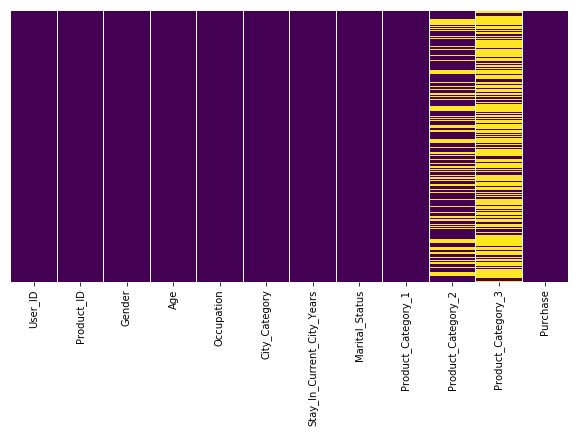

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False,cbar=False)

Creating a copy to update the dataset 

In [10]:
newdata=data.copy()

#### Formating and filling in missing values in Product_Catagory2

We could check their unique values and then assign a default value accordingly for NaNs

In [11]:
print('Product_Category_2', newdata['Product_Category_2'].unique())

Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [12]:
newdata['Product_Category_2'].fillna(value=0,inplace=True)

In [13]:
newdata["Product_Category_2"] = newdata["Product_Category_2"].astype(int)

In [14]:
print('Product_Category_2', newdata['Product_Category_2'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]


#### Formating and filling in missing values in Product_Catagory3

In [15]:
print('Product_Category_3', newdata['Product_Category_3'].unique())

Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [16]:
newdata['Product_Category_3'].fillna(value=0,inplace=True)

In [17]:
newdata["Product_Category_3"] = newdata["Product_Category_3"].astype(int)

In [18]:
print('Product_Category_3', newdata['Product_Category_3'].unique())

Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


#### Drop Unwanted columns

In [19]:
newdata.drop(columns = ["User_ID","Product_ID"],inplace=True)

In [20]:
newdata.tail(4)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537573,M,36-45,16,C,1,0,1,15,16,19196
537574,M,36-45,16,C,1,0,8,15,0,8043
537575,M,36-45,16,C,1,0,5,0,0,7172
537576,M,36-45,16,C,1,0,5,8,0,6875


Analysis of data after clean up

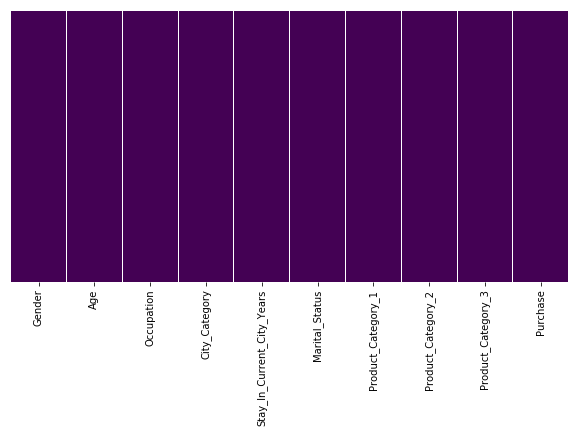

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(newdata.isnull(),cmap='viridis',yticklabels=False,cbar=False)

## Data exploration

Looking at below, looks like very less number of females attended the black friday sale. But it could also mean less number of females paid for the products and may be their spouse paid for them

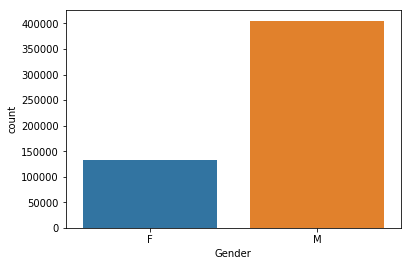

In [22]:
sns.countplot(newdata['Gender'])

Looking at below, seems like the majority of the population in the ages group 26-35 attended the sale

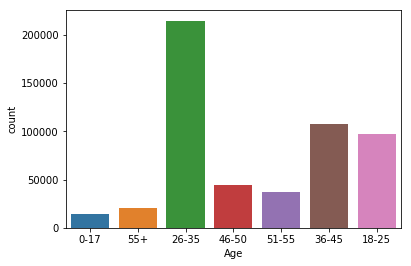

In [23]:
sns.countplot(newdata['Age'])

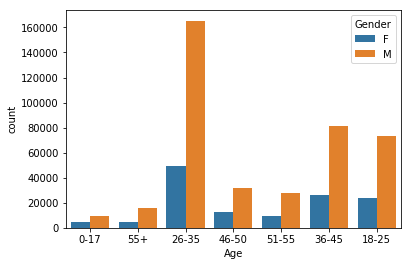

In [24]:
sns.countplot(newdata['Age'],hue=newdata['Gender'])

In [25]:
newdata['combined_G_M'] = newdata.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(newdata['combined_G_M'].unique())
# where 0 stands for 'unmarried' and 1 stands for 'married' customers

['F_0' 'M_0' 'M_1' 'F_1']


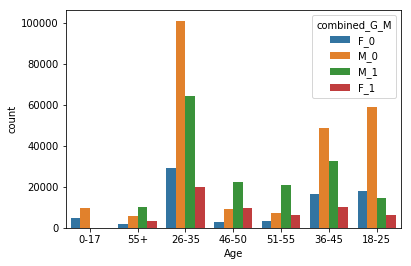

In [26]:
sns.countplot(newdata['Age'],hue=newdata['combined_G_M'])

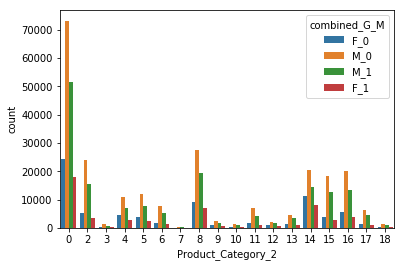

In [27]:
sns.countplot(newdata['Product_Category_2'],hue=newdata['combined_G_M'])

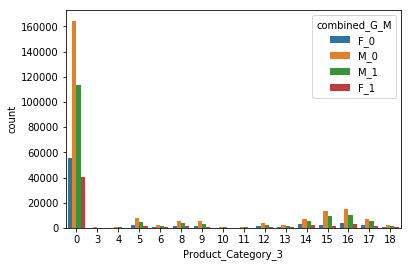

In [28]:
sns.countplot(newdata['Product_Category_3'],hue=newdata['combined_G_M'])

In [29]:
df_by_occupation_and_categories = newdata.groupby(['Occupation','Product_Category_1']).count().reset_index('Product_Category_1')

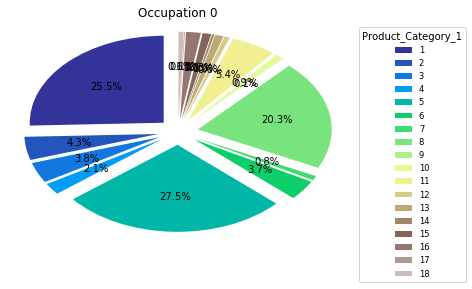

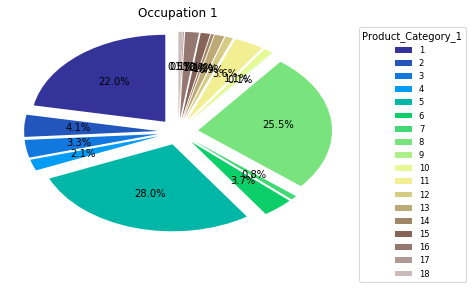

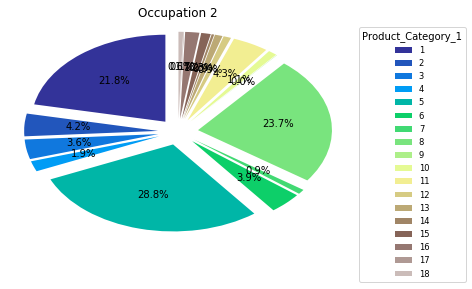

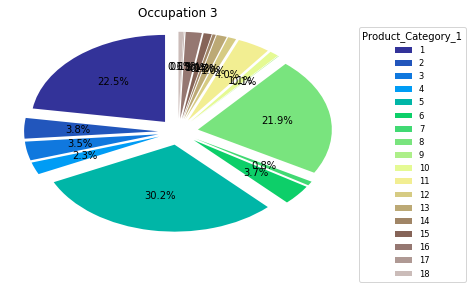

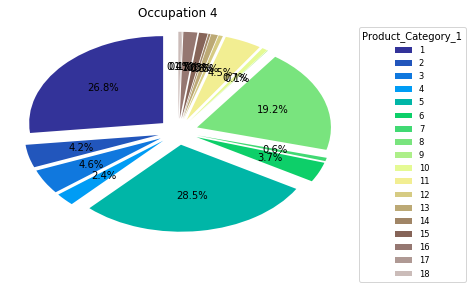

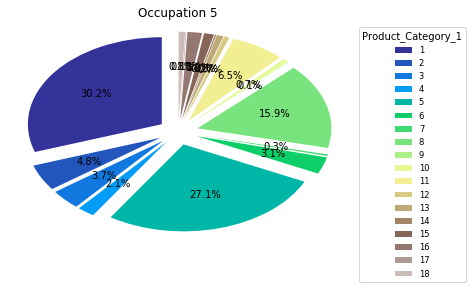

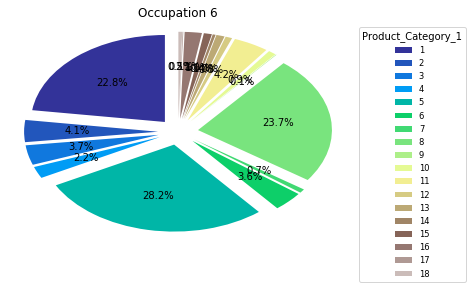

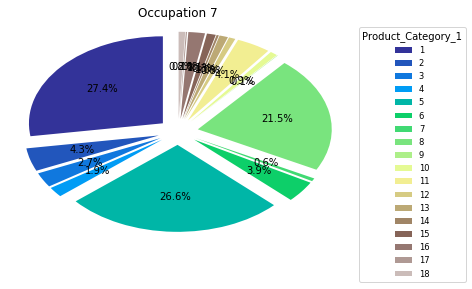

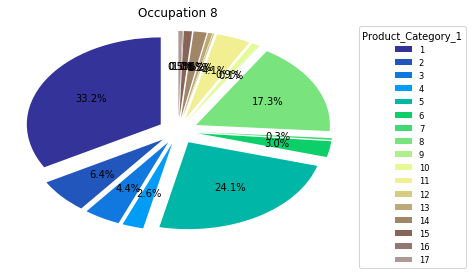

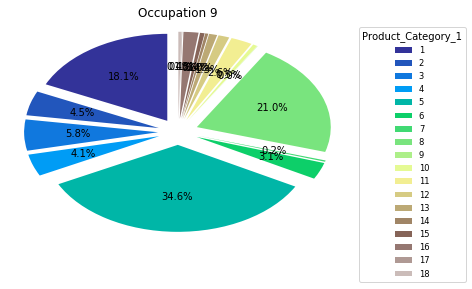

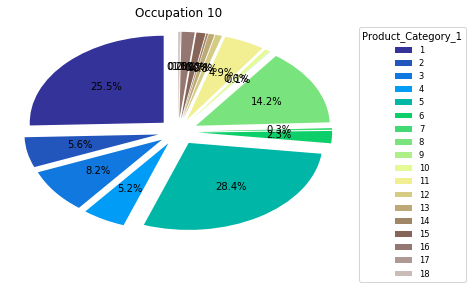

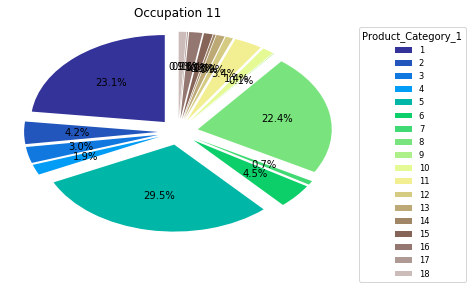

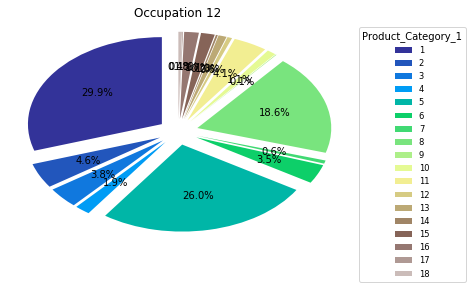

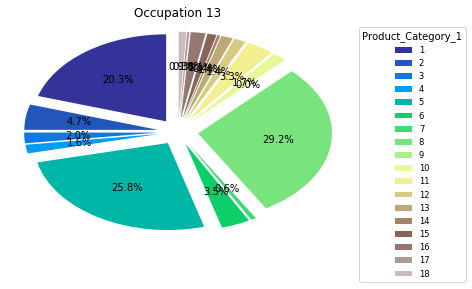

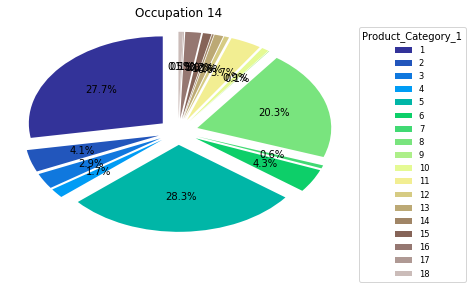

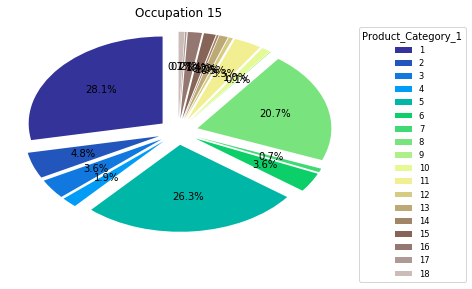

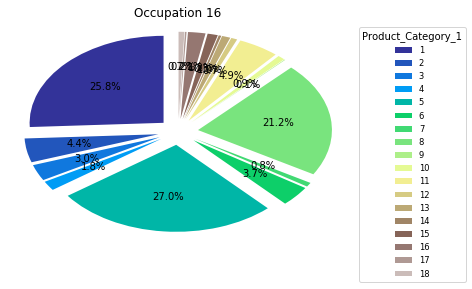

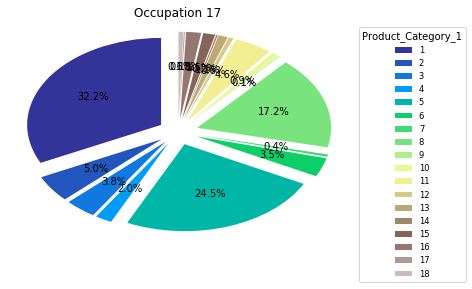

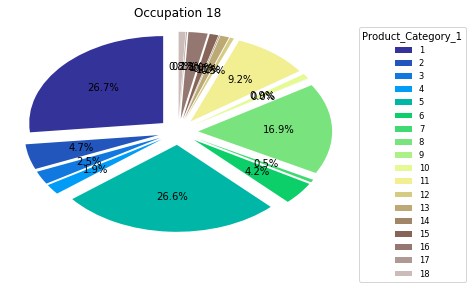

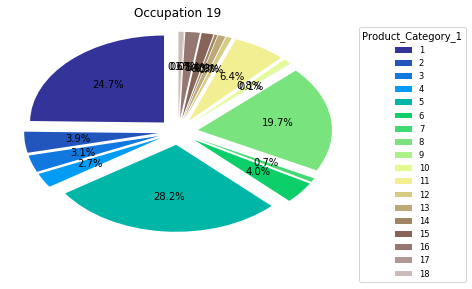

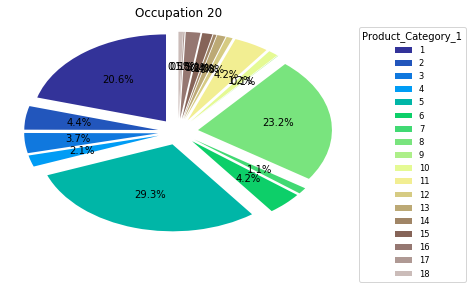

In [30]:
fig = plt.figure()
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
cmap = plt.get_cmap('terrain')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
plotFor = "Occupation {0}"
title = 'Product_Category_1'
for i in range(21):
    explode = [0.15 for i in range(len(df_by_occupation_and_categories['Gender'][i].get_values()))]
    a = plt.pie(df_by_occupation_and_categories['Gender'][i].get_values(), radius=1, colors=colors,startangle=90,autopct='%1.1f%%',explode=explode)
    plt.legend(df_by_occupation_and_categories['Product_Category_1'][0].get_values(),loc='upper center',prop=fontP, bbox_to_anchor=(1.2, 1),title=title)
    plt.title(plotFor.format(i))
    plt.show()

## Modelling

In [31]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
newdata['Gender'] = lb.fit_transform(newdata['Gender'])
newdata['Age'] = lb.fit_transform(newdata['Age'])
newdata['City_Category'] = lb.fit_transform(newdata['City_Category'])
newdata['combined_G_M'] = lb.fit_transform(newdata['combined_G_M'])
newdata['Stay_In_Current_City_Years'] = lb.fit_transform(newdata['Stay_In_Current_City_Years'])

In [32]:
corr_matrix = newdata.corr()
corr_matrix["Purchase"].sort_values(ascending=False)

Purchase                      1.000000
Product_Category_3            0.284120
City_Category                 0.068507
Gender                        0.060086
combined_G_M                  0.052482
Product_Category_2            0.038395
Occupation                    0.021104
Age                           0.017717
Stay_In_Current_City_Years    0.005470
Marital_Status                0.000129
Product_Category_1           -0.314125
Name: Purchase, dtype: float64

#### Single Feature with linear regression

In [63]:
newdata.head(4)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,combined_G_M
0,0,0,10,0,2,0,3,0,0,8370,0
1,0,0,10,0,2,0,1,6,14,15200,0
2,0,0,10,0,2,0,12,0,0,1422,0
3,0,0,10,0,2,0,12,14,0,1057,0


In [33]:
df1 = newdata[['Product_Category_3','Purchase']] 
X = df1.drop(['Purchase'],axis=1)
y = df1['Purchase']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(430061, 1) (430061,)
(107516, 1) (107516,)


In [36]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))

Mean squared error: 22777768.86


In [38]:
print('Variance score: %.2f' % r2_score(y_test, predictions))

Variance score: 0.08


#### Applying Linear Regression with multiple features

In [64]:
newdata.drop(columns = ["Gender",'Marital_Status'],inplace=True)
X = newdata.drop('Purchase', axis = 1)
y = newdata['Purchase'].copy()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(430061, 8) (430061,)
(107516, 8) (107516,)


In [67]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))

Mean squared error: 21420093.42


In [69]:
print('Variance score: %.2f' % r2_score(y_test, predictions))

Variance score: 0.14


##### Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5,random_state=42,n_estimators=100)

In [71]:
regr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
regr.score(X_test,y_test)

0.4972066832257077

In [73]:
predictions = regr.predict(X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))

Mean squared error: 12491668.39


In [74]:
print('Variance score: %.2f' % r2_score(y_test, predictions))

Variance score: 0.50


In [75]:
regr.feature_importances_

array([2.77522793e-05, 2.22018886e-04, 4.35898207e-03, 1.00570042e-06,
       9.86168094e-01, 5.63529648e-03, 3.57017378e-03, 1.66764418e-05])

##### SGD Regressor

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X = scaler.transform(X_train)

In [77]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, random_state=42) 

In [78]:
sgd_reg.fit(X, y_train.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [79]:
scaler.fit(X_test)  
X_t = scaler.transform(X_test)

sgd_reg.score(X_t, y_test.ravel())

0.13730077989618916

##### Support Vector Regression

In [80]:
from sklearn.cross_validation import KFold
from sklearn.svm import SVR

In [81]:
#support_regressor = SVR(kernel='rbf', C=1000)
#support_regressor.fit(X_train, y_train)

In [82]:
#print("Coefficient of determination R^2 on train set: {}".format(support_regressor.score(X_train, y_train)))

##### Decision tree regression

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [85]:
print("Coefficient of determination R^2 on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 on train set: 0.7979675705977646


In [86]:
print("Coefficient of determination R^2 on test set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 on test set: 0.5467163984546666


##### Hyperparameter selection through 3-fold-cross-validation: RMSE

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[1,3,10,30,100,150,300],'max_depth':[1,3,5,7,9]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train,y_train)

In [ ]:
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

#### Conclusion

The results are quite dissapointing. However, at the same time, it looks quite reasonable for this synthetically generated dataset where the given low-level features showed to have very weak relationships with the target variable.

For further optimization of the model, the parameters of RF can be tuned more intensively (by exploring more/deeper trees) or other more sophisticated ML models, such as Gradient Boosted Decision Trees and neural network, can be investigated on this dataset to overcome the bias problem.